<a href="https://colab.research.google.com/github/Ahmed-Sameh-Mostafa/ML1_project/blob/main/notebooks/ML1_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fetching Dataset from offcial website and unzipping the fetched file

In [ ]:
!wget http://www.cbsr.ia.ac.cn/users/xiangyuzhu/projects/3DDFA/Database/AFLW2000-3D.zip

--2022-06-16 18:00:10--  http://www.cbsr.ia.ac.cn/users/xiangyuzhu/projects/3DDFA/Database/AFLW2000-3D.zip
Resolving www.cbsr.ia.ac.cn (www.cbsr.ia.ac.cn)... 159.226.21.60
Connecting to www.cbsr.ia.ac.cn (www.cbsr.ia.ac.cn)|159.226.21.60|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87413900 (83M) [application/x-zip-compressed]
Saving to: ‘AFLW2000-3D.zip’

AFLW2000-3D.zip     100%[===================>]  83.36M   287KB/s    in 5m 11s  

2022-06-16 18:05:21 (275 KB/s) - ‘AFLW2000-3D.zip’ saved [87413900/87413900]



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip AFLW2000-3D.zip -d '/content/drive/MyDrive/ML1_project'

Archive:  AFLW2000-3D.zip
   creating: /content/drive/MyDrive/ML1_project/AFLW2000/
   creating: /content/drive/MyDrive/ML1_project/AFLW2000/Code/
  inflating: /content/drive/MyDrive/ML1_project/AFLW2000/Code/DrawSolidHead.m  
  inflating: /content/drive/MyDrive/ML1_project/AFLW2000/Code/DrawTextureHead.m  
  inflating: /content/drive/MyDrive/ML1_project/AFLW2000/Code/main_show_without_BFM.m  
  inflating: /content/drive/MyDrive/ML1_project/AFLW2000/Code/main_show_with_BFM.m  
   creating: /content/drive/MyDrive/ML1_project/AFLW2000/Code/Mex/
  inflating: /content/drive/MyDrive/ML1_project/AFLW2000/Code/Mex/compile.m  
  inflating: /content/drive/MyDrive/ML1_project/AFLW2000/Code/Mex/Tnorm_Vnorm.h  
  inflating: /content/drive/MyDrive/ML1_project/AFLW2000/Code/Mex/Tnorm_VnormC.cpp  
  inflating: /content/drive/MyDrive/ML1_project/AFLW2000/Code/Mex/Tnorm_VnormC.mexw64  
   creating: /content/drive/MyDrive/ML1_project/AFLW2000/Code/ModelGeneration/
  inflating: /content/drive/MyDrive/ML1

# Importing needed libraries for this section

In [ ]:
import numpy as np
import glob
import scipy.io
from PIL import Image
import matplotlib.pylab as plt
import cv2 as cv 
from google.colab.patches import cv2_imshow # for image display
%matplotlib inline 

# Getting files names and sorting them

In [ ]:
features_paths = sorted(glob.glob("/content/drive/MyDrive/ML1_project/AFLW2000/*.jpg"))
labels_paths = sorted(glob.glob("/content/drive/MyDrive/ML1_project/AFLW2000/*.mat"))

# The below images describes What are yaw, pitch and roll
## They are the labels we need to predict

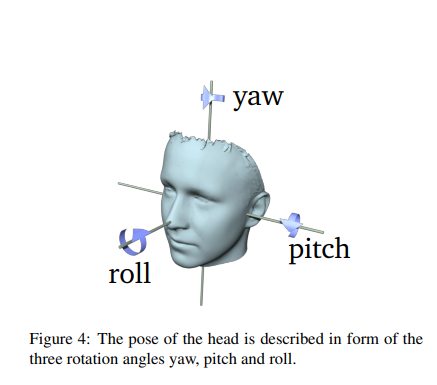

# The pitch is rotation around the x-axis
# The yaw is rotation around the y-axis
# The roll is rotation around the z-axis
## All angles are in radians in the dataset

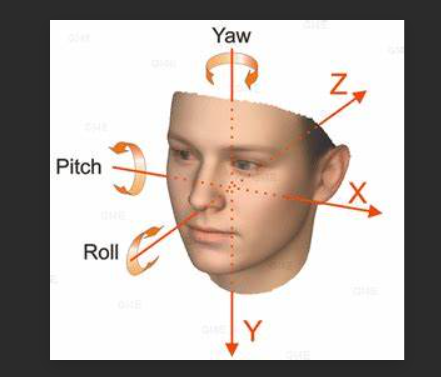

# The postion of these 68 points are the features of every face in the dataset

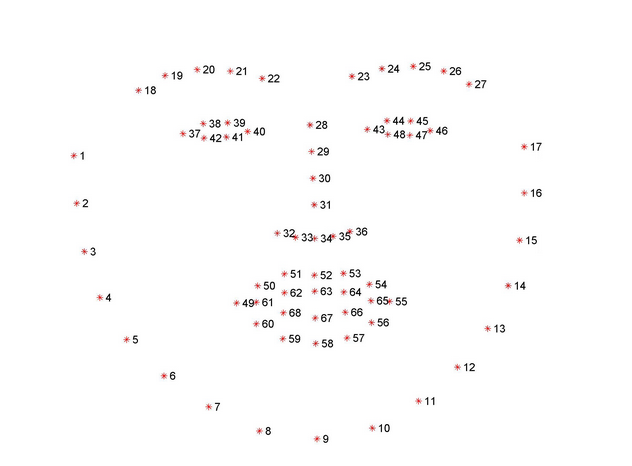

# The below image show how digital images are represented in x-axis and y-axis
# The origin (x =0, y =0) is the top left corner in the image

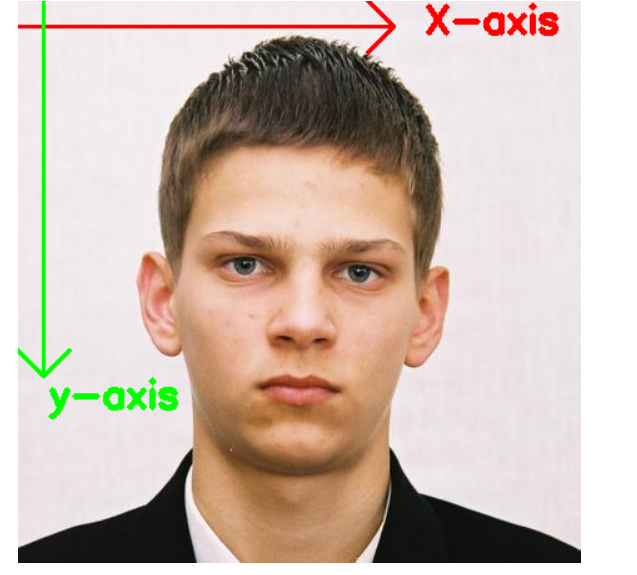

# Extracting Features and labels from the dataset

In [ ]:
features = []
labels = []
pt3d_68_x = []
pt3d_68_y = []
for index, feature_path in enumerate(labels_paths):
  # features.append(np.asarray(Image.open(feature_path)))
  temp = scipy.io.loadmat(labels_paths[index])
  labels.append(temp["Pose_Para"][:,0:3].flatten())
  pt3d_68_x.append(temp["pt3d_68"][0,:].flatten())
  pt3d_68_y.append(temp["pt3d_68"][1,:].flatten())

In [313]:
# print(features[0])
labels_npy = np.array(labels)
print(np.array(labels)) #pitch #yaw #roll

[[-0.39923078  0.01822658  0.08567622]
 [ 0.47006503  1.18953335  0.30095881]
 [-0.18464977  0.88113666 -0.23685244]
 ...
 [-1.44795454  1.43126702 -1.50941825]
 [-0.42046475 -1.19117558  0.45151535]
 [-0.01555222 -0.18012626 -0.02454621]]


In [ ]:
# print(np.array(pt3d_68_x).shape)

In [ ]:
# features = np.c_[pt3d_68_x, pt3d_68_y]
# features.shape

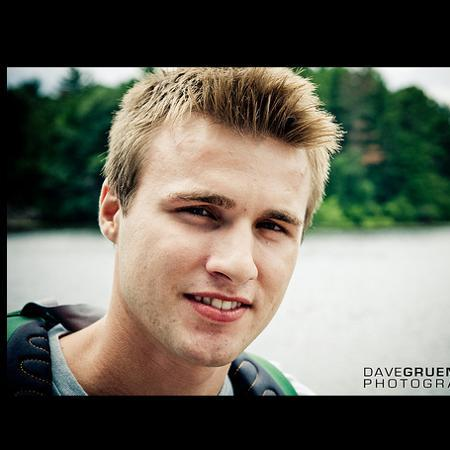

In [314]:
input_image=cv.imread(features_paths[70])
# cv.cvtColor(input_image, cv.COLOR_BGR2RGB)
cv2_imshow(input_image)

# The following function draw axis on the image given the labels(yaw, pitch, roll) in radian it was taken from this [Reference](https://github.com/vitoralbiero/img2pose/issues/2)

In [296]:
def draw_axis(img, yaw, pitch, roll, tdx=None, tdy=None, size=50):
    yaw = -yaw
    
    if tdx != None and tdy != None:
        tdx = tdx
        tdy = tdy
    else:
        height, width = img.shape[:2]
        tdx = width / 2
        tdy = height / 2

    # X-Axis pointing to right drawn in red
    x1 = size * (np.cos(yaw) * np.cos(roll)) + tdx
    y1 = size * (np.cos(pitch) * np.sin(roll) + np.cos(roll) * np.sin(pitch) * np.sin(yaw)) + tdy

    # Y-Axis | drawn in green
    x2 = size * (-np.cos(yaw) * np.sin(roll)) + tdx
    y2 = size * (np.cos(pitch) * np.cos(roll) - np.sin(pitch) * np.sin(yaw) * np.sin(roll)) + tdy

    # Z-Axis (out of the screen) drawn in blue
    x3 = size * (np.sin(yaw)) + tdx
    y3 = size * (-np.cos(yaw) * np.sin(pitch)) + tdy

    cv.line(img, (int(tdx), int(tdy)), (int(x1),int(y1)),(0,0,255),3)
    cv.line(img, (int(tdx), int(tdy)), (int(x2),int(y2)),(0,255,0),3)
    cv.line(img, (int(tdx), int(tdy)), (int(x3),int(y3)),(255,0,0),2)

    return img

In [315]:
for n in range(1000,1020):
  input_image=cv.imread(features_paths[n])
  print(features_paths[n])
  cv2_imshow(draw_axis(input_image,np.array(labels)[n,1],np.array(labels)[n,0],np.array(labels)[n,2], tdx=features[n,30], tdy = features[n,30+68], size = 100))
# cv.arrowedLine(input_image, (0, 20), (300,20),(0,0,255),2)
# cv.putText(input_image,"X-axis",(325,25),cv.FONT_HERSHEY_SIMPLEX,1,(0,0,255),4)

# cv.arrowedLine(input_image, (20, 0), (20,300),(0,255,0),2)
# cv.putText(input_image,"y-axis",(25,325),cv.FONT_HERSHEY_SIMPLEX,1,(0,255,0),4)
# cv2_imshow(input_image)

/content/drive/MyDrive/ML1_project/AFLW2000/image01973.jpg


TypeError: ignored

In [ ]:
print(features.shape)
labels = np.array(labels)
print(labels.shape)

(2000, 136)
(2000, 3)


# Trying out Dlib and how it will find the 68 points [deprecated]

In [ ]:
!wget http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2

In [ ]:
!bunzip2 shape_predictor_68_face_landmarks.dat.bz2

In [ ]:
import dlib

In [ ]:
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor('shape_predictor_68_face_landmarks.dat')

In [ ]:
# The number in the second argument indicates that we should upsample the image
# n time.  This will make everything bigger and allow us to detect more
# faces.
n = 10
print(features_paths[n])
img= cv.imread(features_paths[n])
cv2_imshow(img)
imageRGB = cv.cvtColor(img, cv.COLOR_BGR2RGB)
dets = detector(imageRGB,1)
for idx, det in enumerate(dets):
  shape = predictor(imageRGB, det)
  print("face no:",idx+1,"from", len(dets))
  for i in range(68):
    print(i+1,shape.part(i))


# Installing media pipe

In [ ]:
%%capture
!pip install mediapipe

In [ ]:
import mediapipe

# Testing mediapipe

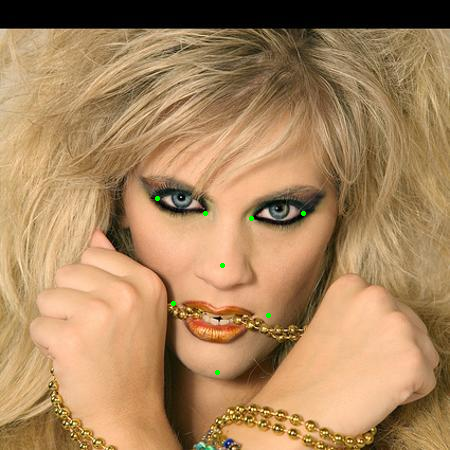

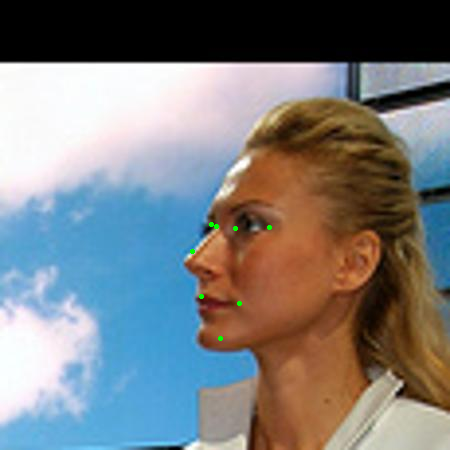

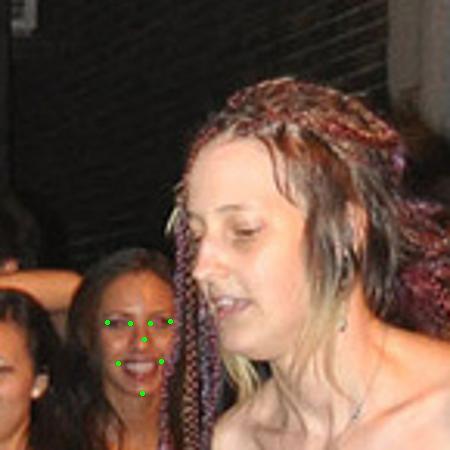

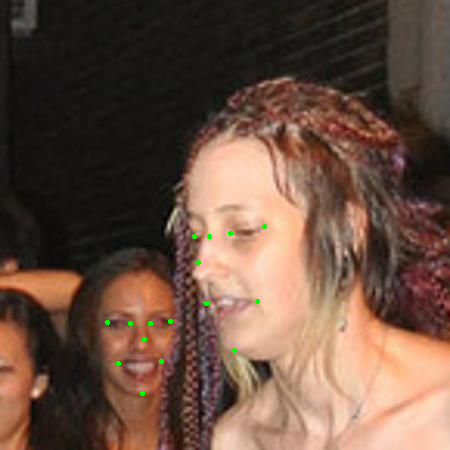

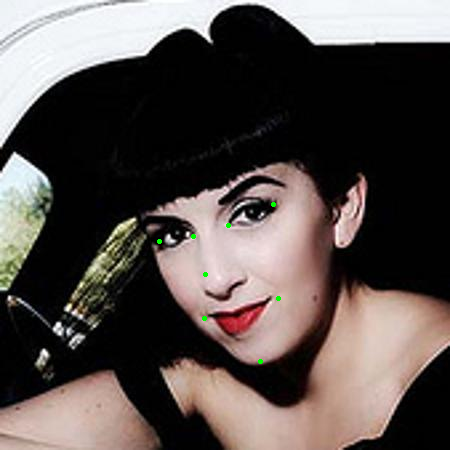

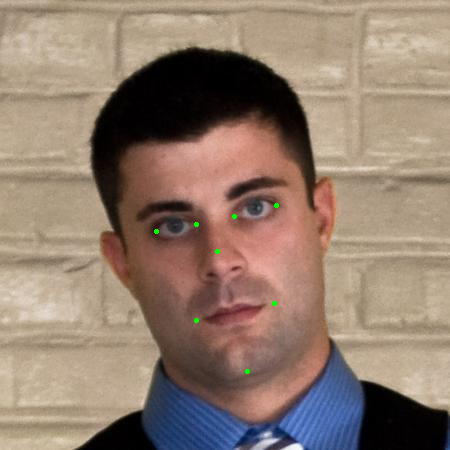

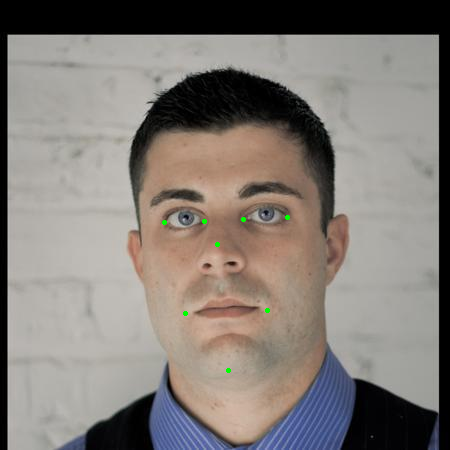

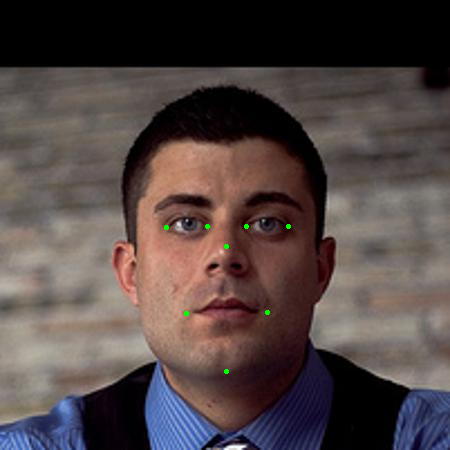

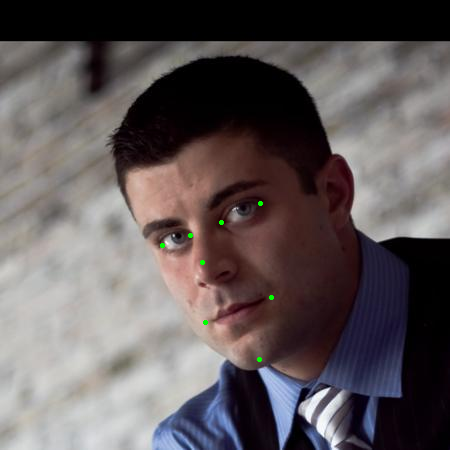

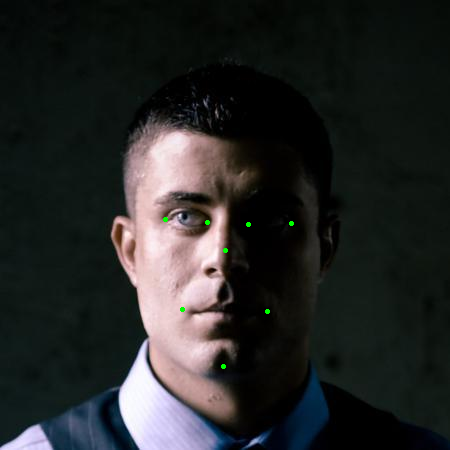

In [ ]:
many_faces_image_paths = []
not_detected_at_all = []
faceModule = mediapipe.solutions.face_mesh
# loading image and its correspinding mat file
with faceModule.FaceMesh(static_image_mode=True,max_num_faces=2) as faces:
    # loading the image
    for image_path in features_paths[:10]:
      image = cv.imread(image_path)
    # processing the face to extract the landmark points (468 point) for each x,y,z
      results = faces.process(cv.cvtColor(image, cv.COLOR_BGR2RGB))
      if results.multi_face_landmarks != None: 
        # looping over the faces in the image
        # if len(results.multi_face_landmarks) > 1:
        many_faces_image_paths.append(index)
        # print(image_path, len(results.multi_face_landmarks))
        for face in results.multi_face_landmarks:
            for idx,landmark in enumerate(face.landmark):
                x = landmark.x
                y = landmark.y
                # print(image_path,x,y)
                # note: the x and y values are scaled to the their width and height so we will get back their actual value in the image
                shape = image.shape 
                relative_x = int(x * shape[1])
                relative_y = int(y * shape[0])
                if idx in [130,243,463,359,152,5,57, 287]:
                  # cv.putText(image, str(idx), (int(relative_x),int(relative_y)), cv.FONT_HERSHEY_SIMPLEX, 0.3, (0,255,0), 1)
                  cv.circle(image, (relative_x, relative_y), radius=1, color=(0, 255, 0), thickness=2)
            cv2_imshow(image)

## 1) getting images that detect more than one face from datatset and images that the model didn't detect any face at all in them.

In [ ]:
many_faces_image_paths = []
not_detected_at_all = []
faceModule = mediapipe.solutions.face_mesh
# loading image and its correspinding mat file
with faceModule.FaceMesh(static_image_mode=True,max_num_faces=2) as faces:
    # loading the image
    for index,image_path in enumerate(features_paths):
      image = cv.imread(image_path)
    # processing the face to extract the landmark points (468 point) for each x,y,z
      results = faces.process(cv.cvtColor(image, cv.COLOR_BGR2RGB))
      if results.multi_face_landmarks != None: 
        # looping over the faces in the image
        if len(results.multi_face_landmarks) > 1:
          many_faces_image_paths.append(index)
          # print(image_path, len(results.multi_face_landmarks))
          # for face in results.multi_face_landmarks:
          #     for landmark in face.landmark:
          #         x = landmark.x
          #         y = landmark.y
          #         # print(image_path,x,y)
          #         # note: the x and y values are scaled to the their width and height so we will get back their actual value in the image
          #         shape = image.shape 
          #         relative_x = int(x * shape[1])
          #         relative_y = int(y * shape[0])
          #         # cv2.putText(image, str(relative_y), (int(relative_x),int(relative_y)), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (0,255,0), 2)
          #         cv.circle(image, (relative_x, relative_y), radius=1, color=(0, 255, 0), thickness=2)
              # cv2_imshow(image)
      else:
        not_detected_at_all.append(index)

In [ ]:
many_faces_image_paths

[2,
 173,
 362,
 385,
 813,
 817,
 819,
 836,
 857,
 1066,
 1159,
 1178,
 1221,
 1303,
 1401,
 1408,
 1504,
 1547,
 1558,
 1612,
 1613,
 1637,
 1857]

In [ ]:
not_detected_at_all

[4,
 14,
 16,
 48,
 74,
 78,
 91,
 96,
 107,
 110,
 155,
 174,
 208,
 216,
 237,
 275,
 282,
 285,
 288,
 291,
 293,
 374,
 440,
 442,
 479,
 519,
 554,
 584,
 699,
 767,
 769,
 787,
 814,
 822,
 825,
 834,
 839,
 840,
 841,
 845,
 856,
 870,
 872,
 874,
 891,
 895,
 896,
 906,
 909,
 917,
 920,
 933,
 937,
 947,
 948,
 949,
 954,
 959,
 973,
 990,
 1014,
 1035,
 1067,
 1081,
 1087,
 1096,
 1126,
 1129,
 1141,
 1150,
 1180,
 1203,
 1206,
 1207,
 1215,
 1228,
 1229,
 1236,
 1242,
 1253,
 1255,
 1256,
 1260,
 1269,
 1291,
 1310,
 1321,
 1322,
 1328,
 1337,
 1363,
 1365,
 1409,
 1410,
 1411,
 1416,
 1441,
 1444,
 1455,
 1466,
 1467,
 1478,
 1482,
 1484,
 1486,
 1487,
 1488,
 1495,
 1503,
 1513,
 1517,
 1519,
 1526,
 1529,
 1530,
 1531,
 1532,
 1548,
 1744,
 1791,
 1795,
 1798,
 1803,
 1808,
 1833,
 1839,
 1848,
 1884,
 1903,
 1923,
 1924,
 1926,
 1939,
 1950,
 1969,
 1972,
 1974,
 1988,
 1993,
 1996,
 1997,
 1998]

## 2) removing these images from the dataset

In [ ]:
images_to_be_removed = many_faces_image_paths + not_detected_at_all

In [ ]:
labels_mod = np.delete(labels,images_to_be_removed,axis = 0)
labels_mod.shape

(1835, 3)

In [ ]:
features_paths_mod = features_paths.copy()
for idx in sorted(images_to_be_removed,reverse = True):
  features_paths_mod.pop(idx)
len(features_paths_mod)

1835

# Extracting features from Dataset using Mediapipe

In [ ]:
features_x = []
features_y = []
with faceModule.FaceMesh(static_image_mode=True,max_num_faces=2) as faces:
    # loading the image
    for index, image_path in enumerate(features_paths_mod):
      image = cv.imread(image_path)
    # processing the face to extract the landmark points (468 point) for each x,y,z
      results = faces.process(cv.cvtColor(image, cv.COLOR_BGR2RGB))
      if results.multi_face_landmarks != None: 
        # looping over the faces in the image
          # many_faces_image_paths.append(index)
          # print(image_path, len(results.multi_face_landmarks))
          for face in results.multi_face_landmarks:
              x_features = []
              y_features = []
              for landmark in face.landmark:
                  x = landmark.x
                  y = landmark.y
                  # print(image_path,x,y)
                  # note: the x and y values are scaled to the their width and height so we will get back their actual value in the image
                  shape = image.shape 
                  relative_x = int(x * shape[1])
                  relative_y = int(y * shape[0])
                  x_features.append(relative_x)
                  y_features.append(relative_y)
              features_x.append(x_features)
              features_y.append(y_features)
      else:
        print(index)
          #         # cv2.putText(image, str(relative_y), (int(relative_x),int(relative_y)), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (0,255,0), 2)
          #         cv.circle(image, (relative_x, relative_y), radius=1, color=(0, 255, 0), thickness=2)
              # cv2_imshow(image)

In [ ]:
print(np.array(features_x).shape)
print(np.array(features_y).shape)

(1835, 468)
(1835, 468)


In [ ]:
features_x_npy = np.array(features_x)
features_y_npy = np.array(features_y)

# Centering and normalizing features

1.   Centering around point with index 45


In [ ]:
features_x_npy = features_x_npy - features_x_npy[:,45].reshape(-1,1)
features_y_npy = features_y_npy - features_y_npy[:,45].reshape(-1,1)

2. Normalizing by dividing by distance between points with indices 9 and 18

In [ ]:
distance = (((features_x_npy[:,9] - features_x_npy[:,18])**2 + (features_y_npy[:,9] - features_y_npy[:,18])**2)**0.5).reshape(-1,1)
distance.shape

(1835, 1)

In [ ]:
features_x_npy = (features_x_npy / distance)
features_y_npy = (features_y_npy / distance)

# merging the two features into one feature

In [ ]:
features_xy_npy = np.c_[features_x_npy,features_y_npy]
features_xy_npy.shape

(1835, 936)

In [ ]:
labels_mod.shape

(1835, 3)

# Saving features and labels in pickle files

In [ ]:
np.save("/content/drive/MyDrive/ML1_project/features.npy", features_xy_npy)
np.save("/content/drive/MyDrive/ML1_project/labels.npy", labels_mod)

Loading features and labels in pickle files

In [ ]:
features_loaded = np.load("/content/drive/MyDrive/ML1_project/features.npy")
features_loaded.shape

(1835, 936)

In [ ]:
labels_loaded = np.load("/content/drive/MyDrive/ML1_project/labels.npy")
labels_loaded.shape

(1835, 3)

# Splitting Data into train , validate and test

In [ ]:
def shuffle(a, b):
    assert len(a) == len(b)
    p = np.random.permutation(len(a))
    return a[p], b[p]

In [ ]:
# importing needed libs
from sklearn.model_selection import train_test_split

In [ ]:
cols_x = [130,243,463,359,152,5,57, 287]
cols_y = [x+468 for x in cols_x]
cols_xy = cols_x+cols_y

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=6)
features_pca = pca.fit_transform(features_loaded)

In [ ]:
pca.explained_variance_ratio_.sum()

0.9933435674392105

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler((0,1))
# scaler.fit(features_loaded[:,cols_xy])
scaler.fit(features_pca)
# features_scaled = scaler.transform(features_loaded[:,cols_xy])
features_scaled = scaler.transform(features_pca)

In [269]:
# pitch
# features_pitch, labels_pitch = shuffle(features,labels[:,0])
features_train_pitch, features_validation_test_pitch, labels_train_pitch, labels_validation_test_pitch = train_test_split(
    features_scaled, labels_loaded[:,0], test_size=0.2, random_state=27)

features_validation_pitch, features_test_pitch, labels_validation_pitch, labels_test_pitch = train_test_split(
    features_validation_test_pitch, labels_validation_test_pitch, test_size=0.5, random_state=27)

# yaw
# features_yaw, labels_yaw = shuffle(features,labels[:,1])
features_train_yaw, features_validation_test_yaw, labels_train_yaw, labels_validation_test_yaw = train_test_split(
    features_scaled, labels_loaded[:,1], test_size=0.2, random_state=42)

features_validation_yaw, features_test_yaw, labels_validation_yaw, labels_test_yaw = train_test_split(
    features_validation_test_yaw, labels_validation_test_yaw, test_size=0.5, random_state=42)

# roll
# features_roll, labels_roll = shuffle(features,labels[:,2])
features_train_roll, features_validation_test_roll, labels_train_roll, labels_validation_test_roll = train_test_split(
    features_scaled, labels_loaded[:,2], test_size=0.2, random_state=42)

features_validation_roll, features_test_roll, labels_validation_roll, labels_test_roll = train_test_split(
    features_validation_test_roll, labels_validation_test_roll, test_size=0.5, random_state=42)

In [ ]:
print("Training features shape:",features_train_pitch.shape)
print("Training labels shape:",labels_train_pitch.shape)
print("Validation features shape:",features_validation_pitch.shape)
print("Validation labels shape:",labels_validation_pitch.shape)
print("Test features shape:",features_test_pitch.shape)
print("Test labels shape:",labels_test_pitch.shape)

Training features shape: (1468, 5)
Training labels shape: (1468,)
Validation features shape: (183, 5)
Validation labels shape: (183,)
Test features shape: (184, 5)
Test labels shape: (184,)


In [ ]:
# print(features_pitch[0,0])
# print(features_yaw[0,0])
# print(features_roll[0,0])


# We'll train six models:

*    Linear regression
*    Decision tree regressor
*    Support vector regressor (SVR)
*    RandomForestRegressor
*    GradientBoostingRegressor
*    AdaBoostRegressor


In [291]:
#importing Models' Libraries
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
import xgboost as xgb

In [ ]:
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

In [ ]:
print(np.min(features[:,30]), features[:,30+68][np.argmin(features[:,30])], np.argmin(features[:,30]))

print(np.max(features[:,30]), features[:,30+68][np.argmax(features[:,30])], np.argmax(features[:,30]))

print(features[:,30][np.argmin(features[:,30+68])], np.min(features[:,30+68]), np.argmin(features[:,30+68]))

print(features[:,30][np.argmax(features[:,30+68])], np.max(features[:,30+68]), np.argmax(features[:,30+68]))

# Shuffling functon for shuffling two numpy arrays in unison [Reference](https://stackoverflow.com/questions/4601373/better-way-to-shuffle-two-numpy-arrays-in-unison)

# Training models for pitch label

In [270]:
lr_pitch = LinearRegression()
lr_pitch.fit(features_train_pitch, labels_train_pitch)

dt_pitch = DecisionTreeRegressor()
dt_pitch.fit(features_train_pitch, labels_train_pitch)

svr_pitch = SVR()
svr_pitch.fit(features_train_pitch, labels_train_pitch)

rf_pitch = RandomForestRegressor()
rf_pitch.fit(features_train_pitch, labels_train_pitch)

gb_pitch = GradientBoostingRegressor()
gb_pitch.fit(features_train_pitch, labels_train_pitch)

ab_pitch = AdaBoostRegressor()
ab_pitch.fit(features_train_pitch, labels_train_pitch)

r_pitch = Ridge()
r_pitch.fit(features_train_pitch, labels_train_pitch)

l_pitch = Lasso()
l_pitch.fit(features_train_pitch, labels_train_pitch)

xgb_pitch = xgb.XGBRegressor()
xgb_pitch.fit(features_train_pitch, labels_train_pitch)

[13:48:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

## R2 score

In [271]:
print("Scores of the models")
print("Linear regression:", lr_pitch.score(features_validation_pitch, labels_validation_pitch))
print("Decision tree:", dt_pitch.score(features_validation_pitch, labels_validation_pitch))
print("SVR:", svr_pitch.score(features_validation_pitch, labels_validation_pitch))
print("Random forest:", rf_pitch.score(features_validation_pitch, labels_validation_pitch))
print("Gradient boosting:", gb_pitch.score(features_validation_pitch, labels_validation_pitch))
print("AdaBoost:", ab_pitch.score(features_validation_pitch, labels_validation_pitch))
print("Ridge:", r_pitch.score(features_validation_pitch, labels_validation_pitch))
print("Lasso:", l_pitch.score(features_validation_pitch, labels_validation_pitch))
print("XGB:", r2_score(labels_validation_pitch, xgb_pitch.predict(features_validation_pitch)))

Scores of the models
Linear regression: 0.6331177569888482
Decision tree: 0.4541288289198765
SVR: 0.7981349282298209
Random forest: 0.6807029988815088
Gradient boosting: 0.7268650184016942
AdaBoost: 0.3606919908683204
Ridge: 0.6335068718057191
Lasso: -0.0001473536853555668
XGB: 0.7140461427920493


In [272]:
print("Scores of the models")
print("Linear regression:", lr_pitch.score(features_test_pitch, labels_test_pitch))
print("Decision tree:", dt_pitch.score(features_test_pitch, labels_test_pitch))
print("SVR:", svr_pitch.score(features_test_pitch, labels_test_pitch))
print("Random forest:", rf_pitch.score(features_test_pitch, labels_test_pitch))
print("Gradient boosting:", gb_pitch.score(features_test_pitch, labels_test_pitch))
print("AdaBoost:", ab_pitch.score(features_test_pitch, labels_test_pitch))
print("Ridge:", r_pitch.score(features_test_pitch, labels_test_pitch))
print("Lasso:", l_pitch.score(features_test_pitch, labels_test_pitch))
print("XGB:", r2_score(labels_test_pitch, xgb_pitch.predict(features_test_pitch)))

Scores of the models
Linear regression: 0.742511627502893
Decision tree: 0.4842480302903873
SVR: 0.8421461355580936
Random forest: 0.8219493610279729
Gradient boosting: 0.7960340469854599
AdaBoost: 0.575940498160697
Ridge: 0.7431694678035269
Lasso: -0.0011847741690758085
XGB: 0.7996688845561326


## mean absolute error

In [ ]:
print("Scores of the models")
print("Linear regression:", mae(labels_validation_pitch, lr_pitch.predict(features_validation_pitch)))
print("Decision tree:", mae(labels_validation_pitch, dt_pitch.predict(features_validation_pitch)))
print("SVR:", mae(labels_validation_pitch, svr_pitch.predict(features_validation_pitch)))
print("Random forest:", mae(labels_validation_pitch, rf_pitch.predict(features_validation_pitch)))
print("Gradient boosting:", mae(labels_validation_pitch, gb_pitch.predict(features_validation_pitch)))
print("AdaBoost:", mae(labels_validation_pitch, ab_pitch.predict(features_validation_pitch)))
print("Ridge:", mae(labels_validation_pitch, r_pitch.predict(features_validation_pitch)))
print("Lasso:", mae(labels_validation_pitch, l_pitch.predict(features_validation_pitch)))
print("XGB:", mae(labels_validation_pitch, xgb_pitch.predict(features_validation_pitch)))

Scores of the models
Linear regression: 0.13033592203477254
Decision tree: 0.16578577583893636
SVR: 0.10542842555540652
Random forest: 0.10985498207183922
Gradient boosting: 0.11808675529278843
AdaBoost: 0.1974168665372159
Ridge: 0.13046489124361013
Lasso: 0.2284792814388436
XGB: 0.1146146774942773


## mean squared error

In [ ]:
print("Scores of the models")
print("Linear regression:", mse(labels_validation_pitch, lr_pitch.predict(features_validation_pitch)))
print("Decision tree:", mse(labels_validation_pitch, dt_pitch.predict(features_validation_pitch)))
print("SVR:", mse(labels_validation_pitch, svr_pitch.predict(features_validation_pitch)))
print("Random forest:", mse(labels_validation_pitch, rf_pitch.predict(features_validation_pitch)))
print("Gradient boosting:", mse(labels_validation_pitch, gb_pitch.predict(features_validation_pitch)))
print("AdaBoost:", mse(labels_validation_pitch, ab_pitch.predict(features_validation_pitch)))
print("Ridge:", mse(labels_validation_pitch, r_pitch.predict(features_validation_pitch)))
print("Lasso:", mse(labels_validation_pitch, l_pitch.predict(features_validation_pitch)))
print("XGB:", mse(labels_validation_pitch, xgb_pitch.predict(features_validation_pitch)))

Scores of the models
Linear regression: 0.04275588234567649
Decision tree: 0.07875079098997838
SVR: 0.02792954488148241
Random forest: 0.03382336100721791
Gradient boosting: 0.03265728468681723
AdaBoost: 0.08718353178841462
Ridge: 0.043190795104814696
Lasso: 0.10810646772272542
XGB: 0.031001483905673408


In [290]:
from sklearn.model_selection import GridSearchCV

In [273]:
svr_parameters = { 'C': [ 0.0001, 0.001,0.01, 0.1, 1 , 10, 50,100,150,800],
                  'gamma':[ 0.0001, 0.001,0.01, 0.1, 1 , 10, 50,100,150],
                  'kernel':['linear', 'rbf']
                }
svr = SVR()
svr_gs = GridSearchCV(estimator = svr,
                      param_grid = svr_parameters)
svr_gs.fit(features_train_pitch, labels_train_pitch)

svr_pitch_winner = svr_gs.best_estimator_
svr_pitch_winner
# print(svr_winner.score(features_train_pitch, labels_train_pitch))
print(svr_pitch_winner.score(features_validation_pitch, labels_validation_pitch))
print("SVR:", svr_pitch_winner.score(features_test_pitch, labels_test_pitch))
# print("SVR:", mae(labels_test_pitch, svr_winner.predict(features_test_pitch)))
# print("SVR:", mse(labels_test_pitch, svr_winner.predict(features_test_pitch)))

0.7582922791251987
SVR: 0.8392781175245778


In [275]:
svr_pitch_winner

SVR(C=50, gamma=0.1)

In [ ]:
xgb_pitch = xgb.XGBRegressor().fit(features_train_pitch,labels_train_pitch)

[10:59:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
xgb_pitch = xgb.XGBRegressor(n_estimators = 1000, max_depth = 10,colsample_bytree = 0.1, subsample = 0.1 )
xgb_pitch = xgb_pitch.fit(features_train_pitch, labels_train_pitch)


[10:59:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
print("XGB:", r2_score(labels_train_pitch, xgb_pitch.predict(features_train_pitch)))
print("XGB:", r2_score(labels_validation_pitch, xgb_pitch.predict(features_validation_pitch)))
print("XGB:", r2_score(labels_test_pitch, xgb_pitch.predict(features_test_pitch)))
print("XGB:", mae(labels_validation_pitch, xgb_pitch.predict(features_validation_pitch)))
print("XGB:", mse(labels_validation_pitch, xgb_pitch.predict(features_validation_pitch)))

XGB: 0.9293040100880487
XGB: -2.1629745197594414
XGB: -2.649413797663402
XGB: 0.32378477546102696
XGB: 0.3416655544484733


---
# Training models for yaw label

In [ ]:
lr_yaw = LinearRegression()
lr_yaw.fit(features_train_yaw, labels_train_yaw)

dt_yaw = DecisionTreeRegressor()
dt_yaw.fit(features_train_yaw, labels_train_yaw)

svr_yaw = SVR()
svr_yaw.fit(features_train_yaw, labels_train_yaw)

rf_yaw = RandomForestRegressor()
rf_yaw.fit(features_train_yaw, labels_train_yaw)

gb_yaw = GradientBoostingRegressor()
gb_yaw.fit(features_train_yaw, labels_train_yaw)

ab_yaw = AdaBoostRegressor()
ab_yaw.fit(features_train_yaw, labels_train_yaw)

xgb_yaw = xgb.XGBRegressor(n_estimators = 500)
xgb_yaw.fit(features_train_yaw, labels_train_yaw)

[12:51:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(n_estimators=500)

In [ ]:
print("Scores of the models")
print("Linear regression:", lr_yaw.score(features_train_yaw, labels_train_yaw))
print("Decision tree:", dt_yaw.score(features_train_yaw, labels_train_yaw))
print("SVR:", svr_yaw.score(features_train_yaw, labels_train_yaw))
print("Random forest:", rf_yaw.score(features_train_yaw, labels_train_yaw))
print("Gradient boosting:", gb_yaw.score(features_train_yaw, labels_train_yaw))
print("AdaBoost:", ab_yaw.score(features_train_yaw, labels_train_yaw))
print("XGB:", r2_score(labels_train_yaw, xgb_yaw.predict(features_train_yaw)))

Scores of the models
Linear regression: 0.829926346539088
Decision tree: 1.0
SVR: 0.8561029330684241
Random forest: 0.9709325347080814
Gradient boosting: 0.9724642240235066
AdaBoost: 0.8902190191377287
XGB: 0.9916394056034679


In [ ]:
print("Scores of the models")
print("Linear regression:", lr_yaw.score(features_validation_yaw, labels_validation_yaw))
print("Decision tree:", dt_yaw.score(features_validation_yaw, labels_validation_yaw))
print("SVR:", svr_yaw.score(features_validation_yaw, labels_validation_yaw))
print("Random forest:", rf_yaw.score(features_validation_yaw, labels_validation_yaw))
print("Gradient boosting:", gb_yaw.score(features_validation_yaw, labels_validation_yaw))
print("AdaBoost:", ab_yaw.score(features_validation_yaw, labels_validation_yaw))
print("XGB:", r2_score(labels_validation_yaw, xgb_yaw.predict(features_validation_yaw)))

Scores of the models
Linear regression: 0.9240780151550055
Decision tree: 0.9087036486212625
SVR: 0.9487808821762879
Random forest: 0.9377998478311644
Gradient boosting: 0.9327719578739803
AdaBoost: 0.863328378066925
XGB: 0.8840924877282765


In [ ]:
print("Scores of the models")
print("Linear regression:", lr_yaw.score(features_test_yaw, labels_test_yaw))
print("Decision tree:", dt_yaw.score(features_test_yaw, labels_test_yaw))
print("SVR:", svr_yaw.score(features_test_yaw, labels_test_yaw))
print("Random forest:", rf_yaw.score(features_test_yaw, labels_test_yaw))
print("Gradient boosting:", gb_yaw.score(features_test_yaw, labels_test_yaw))
print("AdaBoost:", ab_yaw.score(features_test_yaw, labels_test_yaw))
print("XGB:", r2_score(labels_test_yaw, xgb_yaw.predict(features_test_yaw)))

Scores of the models
Linear regression: 0.8496843942042674
Decision tree: 0.8472156536803452
SVR: 0.8723579553078376
Random forest: 0.8581256191534319
Gradient boosting: 0.8670842988825824
AdaBoost: 0.7827285331835933
XGB: 0.8514582057709217


In [ ]:
print("SVR:", svr_yaw.score(features_test_yaw, labels_test_yaw))

SVR: 0.8759908532101112


In [ ]:
svr_parameters = { 'C': [ 0.0001, 0.001,0.01, 0.1, 1 , 10, 50,100,150,200,400,800,1000],
                  'gamma':[ 0.0001, 0.001,0.01, 0.1, 1 , 10,100],
                  'kernel':['linear', 'rbf']
                }
svr = SVR()
svr_gs = GridSearchCV(estimator = svr,
                      param_grid = svr_parameters)
svr_gs.fit(features_train_yaw, labels_train_yaw)

svr_yaw_winner = svr_gs.best_estimator_
svr_yaw_winner
# print(svr_winner.score(features_train_yaw, labels_train_yaw))
print(svr_yaw_winner.score(features_validation_yaw, labels_validation_yaw))
print("SVR:", svr_yaw_winner.score(features_test_yaw, labels_test_yaw))
# print("SVR:", mae(labels_test_yaw, svr_winner.predict(features_test_yaw)))
# print("SVR:", mse(labels_test_yaw, svr_winner.predict(features_test_yaw)))

0.9481468937239961
SVR: 0.8717657528135525


In [ ]:
svr_yaw_winner

SVR(C=800, gamma=0.1)

In [ ]:
print("XGB:", r2_score(labels_test_yaw, xgb_yaw.predict(features_test_yaw)))
print("XGB:", mae(labels_test_yaw, xgb_yaw.predict(features_test_yaw)))
print("XGB:", np.sqrt(mse(labels_test_yaw, xgb_yaw.predict(features_test_yaw))))

XGB: 0.8668240280001784
XGB: 0.07410190165113739
XGB: 0.19584930975684317


---
---
# Training models for roll label

In [ ]:
lr_roll = LinearRegression()
lr_roll.fit(features_train_roll, labels_train_roll)

dt_roll = DecisionTreeRegressor()
dt_roll.fit(features_train_roll, labels_train_roll)

svr_roll = SVR()
svr_roll.fit(features_train_roll, labels_train_roll)

rf_roll = RandomForestRegressor(n_estimators= 500, max_depth=15)
rf_roll.fit(features_train_roll, labels_train_roll)

gb_roll = GradientBoostingRegressor()
gb_roll.fit(features_train_roll, labels_train_roll)

ab_roll = AdaBoostRegressor()
ab_roll.fit(features_train_roll, labels_train_roll)

xgb_roll = xgb.XGBRegressor(n_estimators = 750)
xgb_roll.fit(features_train_roll, labels_train_roll)

[12:56:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(n_estimators=750)

In [ ]:
print("Scores of the models")
print("Linear regression:", lr_roll.score(features_validation_roll, labels_validation_roll))
print("Decision tree:", dt_roll.score(features_validation_roll, labels_validation_roll))
print("SVR:", svr_roll.score(features_validation_roll, labels_validation_roll))
print("Random forest:", rf_roll.score(features_validation_roll, labels_validation_roll))
print("Gradient boosting:", gb_roll.score(features_validation_roll, labels_validation_roll))
print("AdaBoost:", ab_roll.score(features_validation_roll, labels_validation_roll))
print("XGB:", r2_score(labels_validation_roll, xgb_roll.predict(features_validation_roll)))

Scores of the models
Linear regression: 0.6933181312857817
Decision tree: -10.462780548317536
SVR: 0.862154591172358
Random forest: -1.1040050838793256
Gradient boosting: -2.472659067837273
AdaBoost: 0.26036567068693905
XGB: -4.028475603779341


In [ ]:
print("Scores of the models")
print("Linear regression:", lr_roll.score(features_test_roll, labels_test_roll))
print("Decision tree:", dt_roll.score(features_test_roll, labels_test_roll))
print("SVR:", svr_roll.score(features_test_roll, labels_test_roll))
print("Random forest:", rf_roll.score(features_test_roll, labels_test_roll))
print("Gradient boosting:", gb_roll.score(features_test_roll, labels_test_roll))
print("AdaBoost:", ab_roll.score(features_test_roll, labels_test_roll))
print("XGB:", r2_score(labels_test_roll, xgb_roll.predict(features_test_roll)))

Scores of the models
Linear regression: 0.6155098633682172
Decision tree: 0.592592418258253
SVR: 0.7951654462352915
Random forest: 0.7094981931653755
Gradient boosting: 0.6460289256683691
AdaBoost: 0.20731610196312455
XGB: 0.6390913856713092


In [ ]:
svr_parameters = { 'C': [ 0.0001, 0.001,0.01, 0.1, 1 , 10, 50,100,150],
                  'gamma':[ 0.0001, 0.001,0.01, 0.1, 1 , 10, 50,100,150],
                  'kernel':['linear', 'rbf']
                }
svr = SVR()
svr_gs = GridSearchCV(estimator = svr,
                      param_grid = svr_parameters)
svr_gs.fit(features_train_roll, labels_train_roll)

svr_roll_winner = svr_gs.best_estimator_
svr_roll_winner
# print(svr_winner.score(features_train_roll, labels_train_roll))
print(svr_roll_winner.score(features_validation_roll, labels_validation_roll))
print("SVR:", svr_roll_winner.score(features_test_roll, labels_test_roll))
# print("SVR:", mae(labels_test_roll, svr_winner.predict(features_test_roll)))
# print("SVR:", mse(labels_test_roll, svr_winner.predict(features_test_roll)))

0.8935603871936428
SVR: 0.7868679352439756


In [ ]:
svr_roll_winner

SVR(C=50, gamma=1)

In [ ]:
print("SVR:", svr_roll.score(features_test_roll, labels_test_roll))
print("Gradient boosting:", gb_roll.score(features_test_roll, labels_test_roll))
print("XGB:", r2_score(labels_test_roll, xgb_roll.predict(features_test_roll)))

SVR: 0.7959248726103368
Gradient boosting: 0.7627646532977342
XGB: 0.6801785498351782


---
---

# Saving Models

In [289]:
import joblib

In [283]:
# for pitch, i picked the svr model
joblib.dump(svr_pitch_winner, '/content/drive/MyDrive/ML1_project/pitch_model.sav')

['/content/drive/MyDrive/ML1_project/pitch_model.sav']

In [284]:
pitch_loaded = joblib.load('/content/drive/MyDrive/ML1_project/pitch_model.sav')

In [285]:
# for yaw, i picked the svr model
joblib.dump(svr_yaw_winner, '/content/drive/MyDrive/ML1_project/yaw_model.sav')

['/content/drive/MyDrive/ML1_project/yaw_model.sav']

In [286]:
yaw_loaded = joblib.load('/content/drive/MyDrive/ML1_project/yaw_model.sav')

In [318]:
# for roll, i picked the  svr model
joblib.dump(svr_roll_winner, '/content/drive/MyDrive/ML1_project/roll_model.sav')

['/content/drive/MyDrive/ML1_project/roll_model.sav']

In [319]:
roll_loaded = joblib.load('/content/drive/MyDrive/ML1_project/roll_model.sav')

# Test on Video [Reference](https://learnopencv.com/read-write-and-display-a-video-using-opencv-cpp-python/)

In [292]:
%%capture
!pip install mediapipe

In [293]:
import mediapipe

In [321]:
cap = cv.VideoCapture('/content/drive/MyDrive/ML1_project/test_video.mp4')
if (cap.isOpened()== False):
  print("Error opening video stream or file")
else:
  frame_width = int(cap.get(3))
  frame_height = int(cap.get(4))
  out = cv.VideoWriter('/content/drive/MyDrive/ML1_project/outpy.avi',cv.VideoWriter_fourcc('M','J','P','G'), 10, (frame_width,frame_height))

# Read until video is completed
while(cap.isOpened()):
  # Capture frame-by-frame
  ret, frame = cap.read()
  if ret == True:
    feat_x = []
    feat_y = []
    faceModule = mediapipe.solutions.face_mesh
# loading image and its correspinding mat file
    with faceModule.FaceMesh(static_image_mode=True) as faces:
      # loading the image
      results = faces.process(cv.cvtColor(frame, cv.COLOR_BGR2RGB))
      if results.multi_face_landmarks != None: 
          # looping over the faces in the image
            # many_faces_image_paths.append(index)
            # print(image_path, len(results.multi_face_landmarks))
            for face in results.multi_face_landmarks:
                x_feat = []
                y_feat = []
                for landmark in face.landmark:
                    x = landmark.x
                    y = landmark.y
                    # print(image_path,x,y)
                    # note: the x and y values are scaled to the their width and height so we will get back their actual value in the image
                    shape = frame.shape 
                    relative_x = int(x * shape[1])
                    relative_y = int(y * shape[0])
                    # cv.circle(frame, (relative_x, relative_y), radius=1, color=(0, 255, 0), thickness=1)
                    x_feat.append(relative_x)
                    y_feat.append(relative_y)
                # feat_x.append(x_feat)
                # feat_y.append(y_feat)
                feat_x_npy = np.array(x_feat)
                feat_y_npy = np.array(y_feat)
                feat_x_npy = feat_x_npy - feat_x_npy[45].reshape(-1,1)
                feat_y_npy = feat_y_npy - feat_y_npy[45].reshape(-1,1)

    distance = (((feat_x_npy[:,9] - feat_x_npy[:,18])**2 + (feat_y_npy[:,9] - feat_y_npy[:,18])**2)**0.5).reshape(-1,1)
    feat_x_npy = (feat_x_npy / distance)
    feat_y_npy = (feat_y_npy / distance)
    feat_xy_npy = np.c_[feat_x_npy,feat_y_npy]


    feat_pca = pca.transform(feat_xy_npy)
    feat_scaled = scaler.transform(feat_pca)
    pitch_pred = pitch_loaded.predict(feat_scaled)
    yaw_pred = yaw_loaded.predict(feat_scaled)
    roll_pred = roll_loaded.predict(feat_scaled)

    frame_mod = draw_axis(frame,yaw_pred, pitch_pred, roll_pred, tdx = x_feat[45], tdy = y_feat[45],size=100)
    out.write(frame_mod)
    # Press Q on keyboard to  exit
    if cv.waitKey(25) & 0xFF == ord('q'):
      break
  else:
    break

# When everything done, release the video capture object
cap.release()
# Closes all the frames
cv.destroyAllWindows()